### 1.  Import Required Libraries
Import the necessary libraries, including NumPy, sklearn, matplotlib, and keras.

In [1]:
# Importing the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib as mpl

# Setting print options for numpy
np.set_printoptions(suppress=True)

### 2.  Generate and Visualize Dataset
Generate a dataset with 3 clusters using make_blobs function and visualize it using matplotlib.

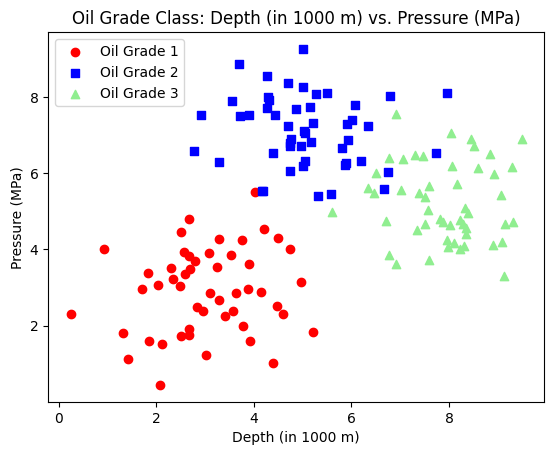

In [2]:
# Define markers and colors for the plot
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

# Define cluster centers
centers = [(3, 3), (5, 7), (8, 5)]

# Generate a dataset with 3 clusters
X, y = make_blobs(n_samples=150, centers=centers, n_features=2)

# Create a color map
cmap = mpl.cm.viridis
# Create a color map
# Plot the generated data for each class separately
for i, center in enumerate(centers):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], marker=markers[i], label=f'Oil Grade {i+1}')

# Add labels and a legend
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Oil Grade Class: Depth (in 1000 m) vs. Pressure (MPa)')
plt.legend()
plt.show()

### 3.  Splitting the Dataset
Split the dataset into training and testing sets using train_test_split function.

In [3]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Print the label counts in y, y_train, and y_test
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### 4.  Plot the splitted Dataset

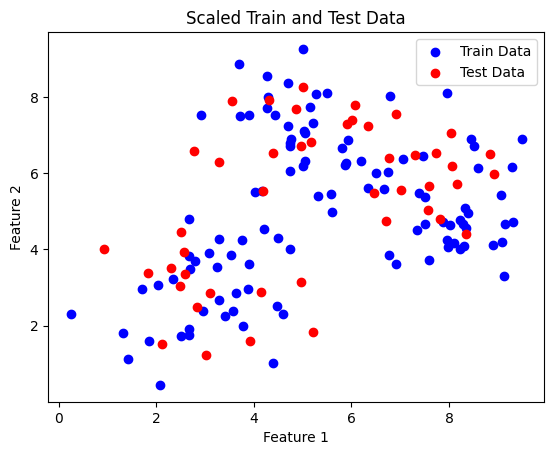

In [4]:
import matplotlib.pyplot as plt

# Plotting the scaled train data
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train Data')

# Plotting the scaled test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scaled Train and Test Data')
plt.legend()
plt.show()


### 5.  Standardizing the Features
Standardize the features using StandardScaler.

In [5]:
# Standardizing the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 6.  Plot standardised Data

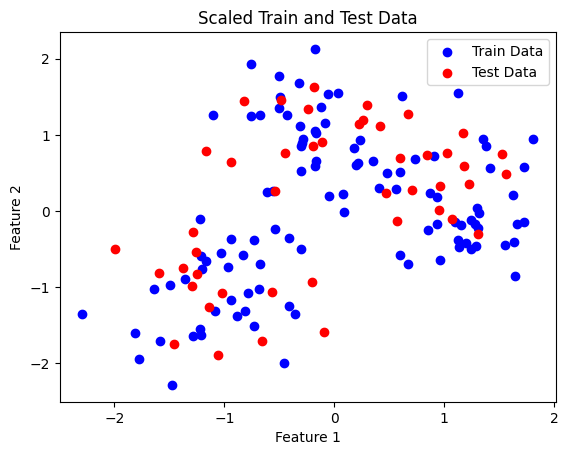

In [6]:
import matplotlib.pyplot as plt

# Plotting the scaled train data
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c='blue', label='Train Data')

# Plotting the scaled test data
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c='red', label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scaled Train and Test Data')
plt.legend()
plt.show()


### 7.  One-hot Encoding of Class Labels
Convert class labels to one-hot encoded vectors using to_categorical function.

In [7]:
# Convert class labels to one-hot encoded vectors
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [8]:
y_test_onehot[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

### 8.  Creating the Neural Network Model
Create a multiclass Neural Network classifier using Keras.

In [9]:
# Create a multiclass NN classifier using Keras
model = Sequential()
model.add(Dense(units=10, input_dim=2, activation='relu'))  # Input layer with 10 neurons and 'relu' activation function
model.add(Dense(units=64, activation='relu'))  # Hidden layer with 64 neurons and 'relu' activation function
model.add(Dense(units=128, activation='relu'))  # Hidden layer with 128 neurons and 'relu' activation function
model.add(Dense(units=64, activation='relu'))  # Hidden layer with 64 neurons and 'relu' activation function
model.add(Dense(units=3, activation='softmax'))  # Output layer with 3 neurons (for 3 classes) and 'softmax' activation function

# Define the optimizer (Adam optimizer with learning rate 0.001)
optimizer = Adam(learning_rate=0.01)

# Compile the model with 'categorical_crossentropy' loss function and 'accuracy' as the metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 9.  Training the Model
Train the model using the fit method.

In [10]:
# Train the model
history = model.fit(X_train_std, y_train_onehot, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
105/105 [==============================] - 1s 2ms/step - loss: 0.6207 - accuracy: 0.8190
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9429
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9429
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9524
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9429
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9619
Epoch 7/50
105/105 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9524
Epoch 8/50
105/105 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9524
Epoch 9/50
105/105 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9524
Epoch 10/50
105/105 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9524

### 10.  Model Evaluation
Evaluate the model by predicting the test data and calculating the accuracy.

In [11]:
# Predict the test data
y_pred_probs = model.predict(X_test_std)
y_pred = np.argmax(y_pred_probs, axis=1)

# Predict the train data
y_pred_probs_train = model.predict(X_train_std)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

# Calculate the accuracy of the model
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Train Data Accuracy: %.3f' % accuracy_train)
accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy: %.3f' % accuracy)

4/4 [==============================] - 0s 2ms/step
Train Data Accuracy: 0.971
Test Data Accuracy: 0.933


### 11.  Visualizing the Decision Boundary
Visualize the decision boundary of the model with both train and test data.

3070/3070 [==============================] - 4s 1ms/step


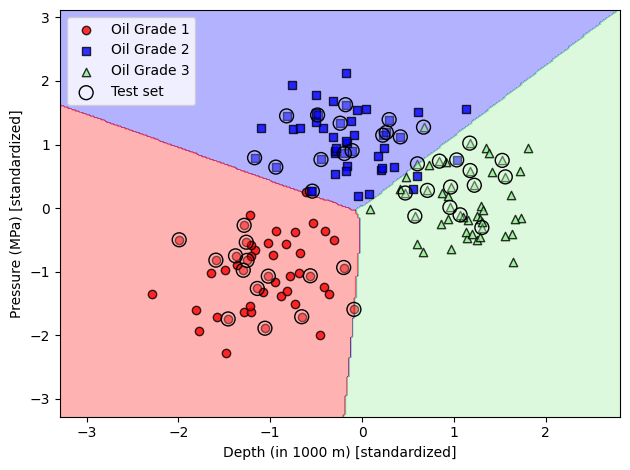

In [12]:
# Function to plot the decision boundary with both train and test data
def plot_decision_boundary_with_test(X_train, y_train, X_test, y_test, model, resolution=0.02):
    # Define markers and colors for the plot
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_train))])
    
    # Create a meshgrid to plot the decision boundary
    x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # Use the model to predict the class for each point in the meshgrid
    Z = np.argmax(model.predict(np.array([xx1.ravel(), xx2.ravel()]).T), axis=1)
    Z = Z.reshape(xx1.shape)
    
    # Plot the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot the training and test data
    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Oil Grade {cl+1}', edgecolor='black')
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1], alpha=0.5, c=colors[idx], marker=markers[idx], edgecolor='black')
    
    # Highlight the test data
    plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')
    
    # Add labels and a legend
    plt.xlabel('Depth (in 1000 m) [standardized]')
    plt.ylabel('Pressure (MPa) [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the function to plot the decision boundary with both train and test data
plot_decision_boundary_with_test(X_train_std, y_train, X_test_std, y_test, model)